<a href="https://colab.research.google.com/github/TamTran72111/learn-ml-dl/blob/master/Augelien_Geron_book/Classification_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


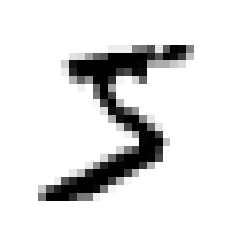

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [4]:
y[0]

'5'

In [0]:
# Cast y to number type, cuz most ML algorithms expect numbers
import numpy as np
y = y.astype(np.uint8)

In [0]:
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

##Training a binary Classifier

In [0]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
# Using Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

##Measure Performance

In [10]:
# Implementing cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [0]:
# Dumb classifier
from sklearn.base import BaseEstimator

class Never5Classifer(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [13]:
never_5_clf = Never5Classifer()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

####Confusion Matrix

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

\begin{equation*}
precision = \frac{TP}{TP + FP}
\end{equation*}

\begin{equation*}
recall = \frac{TP}{TP + FN}
\end{equation*}

Recall is also called *sensitivity* or the *true positive rate*(TPR)


In [16]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


\begin{equation*}
{F}_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \times \frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}
\end{equation*}

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [0]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method='decision_function')

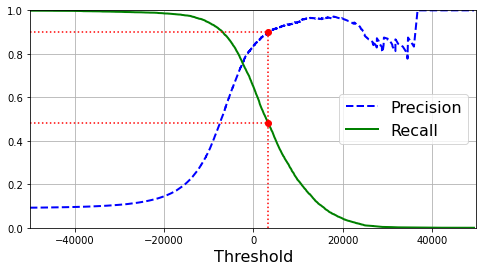

In [20]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label='Precision', linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label='Recall', linewidth=2)
  plt.legend(loc='center right', fontsize=16)
  plt.xlabel('Threshold', fontsize=16)
  plt.grid(True)
  plt.axis([-50_000, 50_000, 0, 1])


recall_90_precision = recalls[np.argmax(precisions >= .9)]
threshold_90_precision = thresholds[np.argmax(precisions >= .9)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0, .9], 'r:')
plt.plot([-50_000, threshold_90_precision], [.9, .9], 'r:')
plt.plot([-50_000, threshold_90_precision], [recall_90_precision, recall_90_precision], 'r:')
plt.plot([threshold_90_precision],[0.9], 'ro')
plt.plot([threshold_90_precision],[recall_90_precision], 'ro')

plt.show()

### ROC curve

**ROC** (Receiver operating characteristic) curve plots the true positive rate (recall) against the false positive rate (FPR)

*Specificity* is also called true negative rate (TNR), and equals to 1 - FPR

Hence, the ROC curve plots *sensitivity* (recall) versus 1 - *specificity*

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

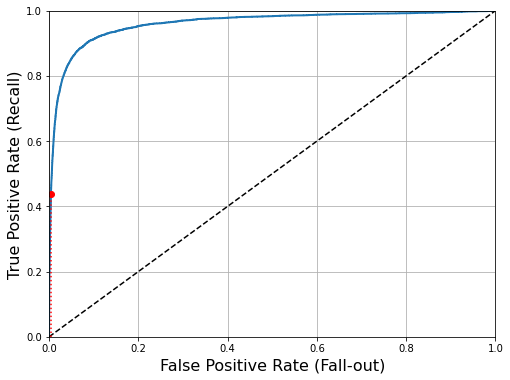

In [22]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0 ,1])
  plt.xlabel('False Positive Rate (Fall-out)', fontsize=16)
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)
  plt.grid(True)


plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0, 0.4368], 'r:')
plt.plot([0, 4.837e-3], [0.4368, 0.4368], 'r:')
plt.plot([4.837e-3], [.4368], 'ro')
plt.show()

In [23]:
# AUC: Area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method='predict_proba')

In [0]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)


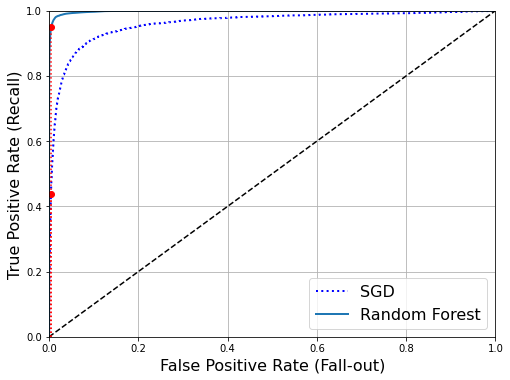

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b:', linewidth=2, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.plot([4.837e-3, 4.837e-3], [0, .4368], 'r:')
plt.plot([0, 4.837e-3], [.4368, .4368], 'r:')
plt.plot([4.837e-3], [0.4368], 'ro')
plt.plot([4.837e-3, 4.837e-3], [0, .9487], 'r:')
plt.plot([4.837e-3], [0.9487], 'ro')
plt.grid(True)
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [27]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [28]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(precision_score(y_train_5, y_train_pred_forest))
print(recall_score(y_train_5, y_train_pred_forest))

0.9905083315756169
0.8662608374838591


## Multiclass Classification

In [29]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [30]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [31]:
print(np.argmax(some_digit_scores))
svm_clf.classes_

5


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [32]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [33]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [34]:
cross_val_score(sgd_clf, X_train, y_train, cv=3,
                scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [35]:
# Scaling input
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

## Error Analysis

In [36]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

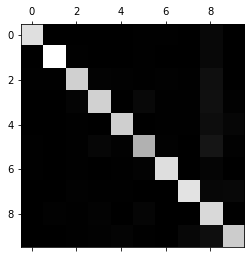

In [37]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

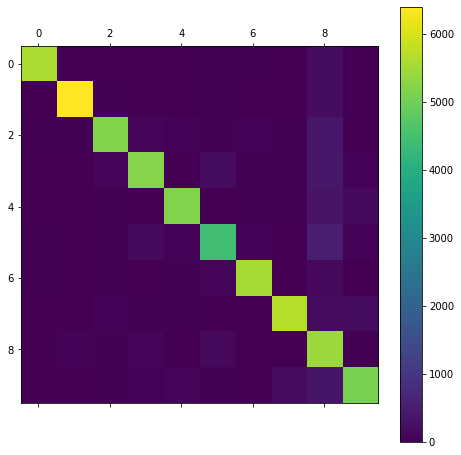

In [38]:
def plot_confusion_matrix(matrix):
  """Plot with color"""
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(matrix)
  fig.colorbar(cax)

plot_confusion_matrix(conf_mx)
plt.show()

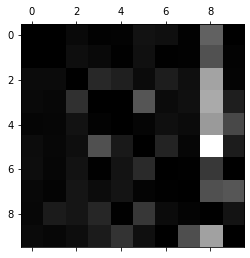

In [39]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Fill the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## Multilabel Classification

In [40]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [42]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

## Multioutput Classification

In [0]:
# Create the training and test sets
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

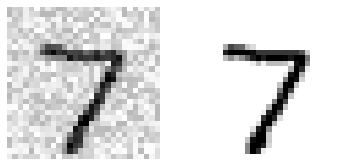

In [44]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

some_index = 0
plt.subplot(121)
plot_digit(X_test_mod[some_index])
plt.subplot(122)
plot_digit(y_test_mod[some_index])
plt.show()

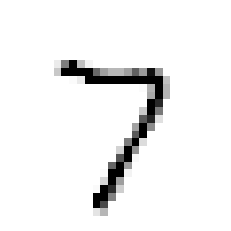

In [45]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

## Exercise

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [3,4,5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.972, total=17.1min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 17.1min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.971, total=17.1min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 34.2min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=17.1min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=17.0min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.970, total=17.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=17.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=17.1min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=17.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=17.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 513.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [55]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [56]:
grid_search.best_score_

0.9716166666666666

In [57]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [0]:
# Question 2
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
  image = image.reshape([28, 28])
  shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
  return shifted_image.reshape([-1])

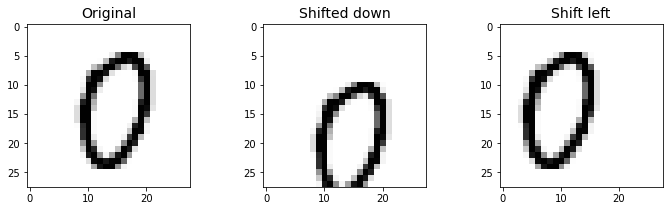

In [60]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title('Original', fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation='nearest', cmap='Greys')
plt.subplot(132)
plt.title('Shifted down', fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation='nearest', cmap='Greys')
plt.subplot(133)
plt.title('Shift left', fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation='nearest', cmap='Greys')
plt.show()

In [0]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
  for image, label in zip(X_train, y_train):
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [0]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [0]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [65]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [0]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

#### Question 3: Tackle the Titanic dataset

In [0]:
import os
TITANIC_PATH = '/content/'

In [0]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
  csv_path = os.path.join(titanic_path, filename)
  return pd.read_csv(csv_path)

In [0]:
train_data = load_titanic_data('train.csv')
test_data = load_titanic_data('test.csv')

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# target
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X[self.attribute_names]

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
  ('select_numeric', DataFrameSelector(['Age', 'SibSp', 'Parch', 'Fare'])),
  ('imputer', SimpleImputer(strategy='median')),
])

In [16]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [0]:
# Imputer for categorical columns
class MostFrequentImputer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                    index=X.columns)
    return self

  def transform(self, X, y=None):
    return X.fillna(self.most_frequent_)

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
cat_pipeline = Pipeline([
  ('select_cat', DataFrameSelector(['Pclass', 'Sex', 'Embarked'])),
  ('imputer', MostFrequentImputer()),
  ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [20]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [0]:
# Old way using FeatureUnion, should prefer ColumnTransformer in Scikit-Learn 0.2
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
  ('num_pipeline', num_pipeline),
  ('cat_pipeline', cat_pipeline),
])


In [0]:
X_train = preprocess_pipeline.fit_transform(train_data)

In [23]:
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [0]:
y_train = train_data["Survived"]

In [25]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

In [27]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.7329588014981274

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126466916354558

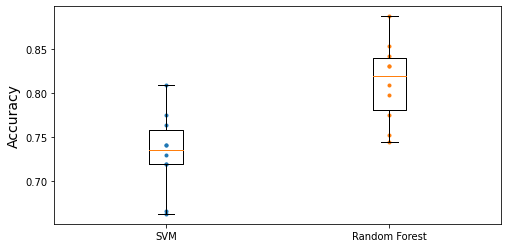

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, '.')
plt.plot([2]*10, forest_scores, '.')
plt.boxplot([svm_scores, forest_scores], labels=('SVM', 'Random Forest'))
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [33]:
train_data['AgeBucket'] = train_data['Age'] // 15 * 15
train_data[['AgeBucket', 'Survived']].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [34]:
train_data['RelativesOnboard'] = train_data['SibSp'] + train_data['Parch']
train_data[['RelativesOnboard', 'Survived']].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [0]:
# Question 4: Spam classifier
import os
import tarfile
import urllib

DOWNLOAD_ROOT = 'http://spamassassin.apache.org/old/publiccorpus/'
HAM_URL = DOWNLOAD_ROOT + '20030228_easy_ham.tar.bz2'
SPAM_URL = DOWNLOAD_ROOT + '20030228_spam.tar.bz2'
SPAM_PATH = os.path.join('dataset', 'spam')

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
  if not os.path.isdir(spam_path):
    os.makedirs(spam_path)
  for filename, url in (('ham.tar.bz2', HAM_URL), ('spam.tar.bz2', SPAM_URL)):
    path = os.path.join(spam_path, filename)
    if not os.path.isfile(path):
      urllib.request.urlretrieve(url, path)
    tar_bz2_file = tarfile.open(path)
    tar_bz2_file.extractall(path=spam_path)
    tar_bz2_file.close()


In [0]:
fetch_spam_data()

In [0]:
HAM_DIR = os.path.join(SPAM_PATH, 'easy_ham')
SPAM_DIR = os.path.join(SPAM_PATH, 'spam')
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [38]:
len(ham_filenames)

2500

In [39]:
len(spam_filenames)

500

In [0]:
# Use Python's email module to parse emails( this handles headers, encoding,...)
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
  directory = 'spam' if is_spam else 'easy_ham'
  with open(os.path.join(spam_path, directory, filename), 'rb') as f:
    return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [0]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [42]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [0]:
def get_email_structure(email):
  if isinstance(email, str):
    return email
  payload = email.get_payload()
  if isinstance(payload, list):
    return 'multipart({})'.format(', '.join([
            get_email_structure(sub_email)
            for sub_email in payload
    ]))
  else:
    return email.get_content_type()

In [0]:
from collections import Counter

def structures_counter(emails):
  structures = Counter()
  for email in emails:
    structure = get_email_structure(email)
    structures[structure] += 1
  return structures

In [48]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [49]:
structures_counter(spam_emails).most_common()


[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [50]:
for header, value in spam_emails[0].items():
  print(header, ":", value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [51]:
spam_emails[0]['Subject']

'Life Insurance - Why Pay More?'

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails)
y = np.array([0]* len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
import re
from html import unescape

def html_to_plain_text(html):
  text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
  text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
  text = re.sub('<.*?>', '', text, flags=re.M | re.S)
  text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
  return unescape(text)

In [54]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == 'text/html']

sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], '...')

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [57]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], '...')


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [0]:
def email_to_text(email):
  html = None
  for part in email.walk():
    ctype = part.get_content_type()
    if not ctype in ('text/plain', 'text/html'):
      continue
    try:
      content = par.get_content()
    except: # in case of encoding issues
      content = str(part.get_payload())
    if ctype == 'text/plain':
      return content
    else:
      html = content
  if html:      
    return html_to_plain_text(html)

In [59]:
print(email_to_text(sample_html_spam)[:100], '...')


OTC=
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wa ...


In [60]:
!pip install nltk

In [61]:
try:
  import nltk

  stemmer = nltk.PorterStemmer()
  for word in ('Computations', 'Computation', 'Computing', 'Computed', 'Compute', 'Compulsive'):
    print(word, '=>', stemmer.stem(word))
except ImportError:
  print('Error: stemming requires the NLTK module')
  stemmer = None

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [62]:
!pip install urlextract

In [63]:
try:
  import urlextract

  url_extractor = urlextract.URLExtract()
  print(url_extractor.find_urls('Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s'))
except ImportError:
  print("Error: replacing URLS requires the urlextract module")
  url_extractor = None

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
               replace_urls=True, replace_numbers=True, stemming=True):
    self.strip_headers = strip_headers
    self.lower_case = lower_case
    self.remove_punctuation = remove_punctuation
    self.replace_urls = replace_urls
    self.replace_numbers = replace_numbers
    self.stemming = stemming

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    X_transformed = []
    for email in X:
      text = email_to_text(email) or ''
      if self.lower_case:
        text = text.lower()
      if self.replace_urls and url_extractor:
        urls = list(set(url_extractor.find_urls(text)))
        urls.sort(key=lambda url: len(url), reverse=True)
        for url in urls:
          text = text.replace(url, " URL ")
      if self.replace_numbers:
        text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', 'NUMBER', text)
      if self.remove_punctuation:
        text = re.sub(r'\W+', ' ', text, flags=re.M)
      word_counts = Counter(text.split())
      if self.stemming and stemmer:
        stemmed_word_counts = Counter()
        for word, count in word_counts.items():
          stemmed_word = stemmer.stem(word)
          stemmed_word_counts[stemmed_word] += count
        word_counts = stemmed_word_counts
      X_transformed.append(word_counts)
    return np.array(X_transformed)

In [71]:
X_few = X_train[:3]
X_few_transformed = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_transformed

array([Counter({'chuck': 1, 'murcko': 1, 'wrote': 1, 'stuff': 1, 'yawn': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'all': 3, 'christian': 3, 'to': 3, 'by': 3, 'jefferson': 2, 'i': 2, 'have': 2, 'superstit': 2, 'one': 2, 'on': 2, 'been': 2, 'ha': 2, 'half': 2, 'rogueri': 2, 'teach': 2, 'jesu': 2, 'some': 1, 'interest': 1, 'quot': 1, 'url': 1, 'thoma': 1, 'examin': 1, 'known': 1, 'word': 1, 'do': 1, 'not': 1, 'find': 1, 'in': 1, 'our': 1, 'particular': 1, 'redeem': 1, 'featur': 1, 'they': 1, 'are': 1, 'alik': 1, 'found': 1, 'fabl': 1, 'mytholog': 1, 'million': 1, 'innoc': 1, 'men': 1, 'women': 1, 'children': 1, 'sinc': 1, 'introduct': 1, 'burnt': 1, 'tortur': 1, 'fine': 1, 'imprison': 1, 'what': 1, 'effect': 1, 'thi': 1, 'coercion': 1, 'make': 1, 'world': 1, 'fool': 1, 'other': 1, 'hypocrit': 1, 'support': 1, 'error': 1, 'over': 1, 'earth': 1, 'six': 1, 'histor': 1, 'american': 1, 'john': 1, 'e': 1, 'remsburg': 1, 'letter': 1, 'william': 1, 'short': 1, 'again': 1, 'becom

In [0]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, vocabulary_size=1000):
    self.vocabulary_size = vocabulary_size

  def fit(self, X, y=None):
    total_count = Counter()
    for word_count in X:
      for word, count in word_count.items():
        total_count[word] ++ min(count, 10)
    most_common = total_count.most_common()[:self.vocabulary_size]
    self.most_common_ = most_common
    self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
    return self

  def transform(self, X, y=None):
    rows = []
    cols = []
    data = []
    for row, word_count in enumerate(X):
      for word, count in word_count.items():
        rows.append(row)
        cols.append(self.vocabulary_.get(word, 0))
        data.append(count)
    return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [75]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_transformed)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.longlong'>'
	with 3 stored elements in Compressed Sparse Row format>

In [76]:
X_few_vectors.toarray()

array([[  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [143,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 81,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [0]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
  ('email_to_wordcount', EmailToWordCounterTransformer()),
  ('wordcount_to_vector', WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [81]:
X_train_transformed.shape

(2400, 1001)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression(solver='lbfgs', random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] .................................... , score=0.831, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.830, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.830, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.8304166666666667

In [83]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression(solver='lbfgs', random_state=42)
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 33.33%
Recall: 1.05%
